## 1.	Determine which film genres are at present high performing at the box office.

In [15]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data1  = pd.read_csv('genre_averages.csv')
data1.head()

,Genre,averagerating,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI
0,Biography,6.971795,2.545666e+07,3.469678e+07,7.231284e+07,1.070096e+08,8.155297e+07,640.203056
1,Animation,6.498425,8.679362e+07,1.173423e+08,3.215562e+08,4.388985e+08,3.521049e+08,485.791763
2,Romance,6.280126,2.055426e+07,2.973649e+07,6.367772e+07,9.341421e+07,7.285994e+07,479.335480
3,Mystery,6.016742,2.137133e+07,3.143797e+07,7.013449e+07,1.015725e+08,8.020112e+07,981.774402
4,Sci-Fi,6.155500,7.100522e+07,9.272728e+07,2.499700e+08,3.426973e+08,2.716921e+08,341.363291


In [17]:
# Sort the DataFrame by total_revenue in descending order
desc_data = data1.sort_values(by='total_revenue', ascending=False)
desc_data.head(10)

,Genre,averagerating,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI
1,Animation,6.498425,8.679362e+07,1.173423e+08,3.215562e+08,4.388985e+08,3.521049e+08,485.791763
9,Adventure,6.391441,9.158111e+07,1.064022e+08,2.975774e+08,4.039797e+08,3.123986e+08,333.720975
4,Sci-Fi,6.155500,7.100522e+07,9.272728e+07,2.499700e+08,3.426973e+08,2.716921e+08,341.363291
14,Fantasy,6.008721,7.007436e+07,7.876512e+07,2.181551e+08,2.969202e+08,2.268458e+08,549.776842
17,Action,6.117292,6.605217e+07,7.206188e+07,1.938266e+08,2.658884e+08,1.998363e+08,356.245338
20,Musical,6.404762,3.819048e+07,7.599518e+07,1.756130e+08,2.516082e+08,2.134177e+08,398.151818
10,Family,6.217986,5.403068e+07,7.109600e+07,1.675690e+08,2.386650e+08,1.846343e+08,569.397770
15,Comedy,6.177358,3.363656e+07,4.817198e+07,1.077924e+08,1.559644e+08,1.223278e+08,435.458791
18,Music,6.445556,2.024911e+07,4.066417e+07,8.954808e+07,1.302122e+08,1.099631e+08,414.095814
12,Western,6.286667,4.945333e+07,4.021528e+07,8.176920e+07,1.219845e+08,7.253115e+07,99.230871


In [18]:
# Sort the DataFrame by total_revenue in descending order
desc_data1 = data1.sort_values(by='net_revenue', ascending=False)
desc_data1.head(10)

,Genre,averagerating,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI
1,Animation,6.498425,8.679362e+07,1.173423e+08,3.215562e+08,4.388985e+08,3.521049e+08,485.791763
9,Adventure,6.391441,9.158111e+07,1.064022e+08,2.975774e+08,4.039797e+08,3.123986e+08,333.720975
4,Sci-Fi,6.155500,7.100522e+07,9.272728e+07,2.499700e+08,3.426973e+08,2.716921e+08,341.363291
14,Fantasy,6.008721,7.007436e+07,7.876512e+07,2.181551e+08,2.969202e+08,2.268458e+08,549.776842
20,Musical,6.404762,3.819048e+07,7.599518e+07,1.756130e+08,2.516082e+08,2.134177e+08,398.151818
17,Action,6.117292,6.605217e+07,7.206188e+07,1.938266e+08,2.658884e+08,1.998363e+08,356.245338
10,Family,6.217986,5.403068e+07,7.109600e+07,1.675690e+08,2.386650e+08,1.846343e+08,569.397770
15,Comedy,6.177358,3.363656e+07,4.817198e+07,1.077924e+08,1.559644e+08,1.223278e+08,435.458791
18,Music,6.445556,2.024911e+07,4.066417e+07,8.954808e+07,1.302122e+08,1.099631e+08,414.095814
11,Sport,6.581967,2.420697e+07,4.023151e+07,7.903346e+07,1.192650e+08,9.505800e+07,656.995499


In [19]:
# Sort the DataFrame by total_revenue in descending order
desc_data2 = data1.sort_values(by='ROI', ascending=False)
desc_data2.head(7)

,Genre,averagerating,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI
13,Horror,5.351977,1.817108e+07,2.854655e+07,6.493768e+07,9.348423e+07,7.531315e+07,1164.154432
3,Mystery,6.016742,2.137133e+07,3.143797e+07,7.013449e+07,1.015725e+08,8.020112e+07,981.774402
19,Thriller,5.843408,2.736711e+07,3.299267e+07,8.185753e+07,1.148502e+08,8.748310e+07,752.041710
11,Sport,6.581967,2.420697e+07,4.023151e+07,7.903346e+07,1.192650e+08,9.505800e+07,656.995499
0,Biography,6.971795,2.545666e+07,3.469678e+07,7.231284e+07,1.070096e+08,8.155297e+07,640.203056
5,Documentary,7.132653,2.253645e+07,2.968135e+07,5.843281e+07,8.811416e+07,6.557771e+07,572.757720
10,Family,6.217986,5.403068e+07,7.109600e+07,1.675690e+08,2.386650e+08,1.846343e+08,569.397770


In [20]:
data1  = pd.read_csv('genre_averages.csv')
data1.head()

,Genre,averagerating,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI
0,Biography,6.971795,2.545666e+07,3.469678e+07,7.231284e+07,1.070096e+08,8.155297e+07,640.203056
1,Animation,6.498425,8.679362e+07,1.173423e+08,3.215562e+08,4.388985e+08,3.521049e+08,485.791763
2,Romance,6.280126,2.055426e+07,2.973649e+07,6.367772e+07,9.341421e+07,7.285994e+07,479.335480
3,Mystery,6.016742,2.137133e+07,3.143797e+07,7.013449e+07,1.015725e+08,8.020112e+07,981.774402
4,Sci-Fi,6.155500,7.100522e+07,9.272728e+07,2.499700e+08,3.426973e+08,2.716921e+08,341.363291


In [21]:
data3 = pd.read_csv('genre_average_updated.csv')
data3.head(7)

,Genre,averagerating,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI,movie_count
0,Biography,6.971795,2.545666e+07,3.469678e+07,7.231284e+07,1.070096e+08,8.155297e+07,640.203056,195
1,Animation,6.498425,8.679362e+07,1.173423e+08,3.215562e+08,4.388985e+08,3.521049e+08,485.791763,127
2,Romance,6.280126,2.055426e+07,2.973649e+07,6.367772e+07,9.341421e+07,7.285994e+07,479.335480,317
3,Mystery,6.016742,2.137133e+07,3.143797e+07,7.013449e+07,1.015725e+08,8.020112e+07,981.774402,221
4,Sci-Fi,6.155500,7.100522e+07,9.272728e+07,2.499700e+08,3.426973e+08,2.716921e+08,341.363291,200
5,Documentary,7.132653,2.253645e+07,2.968135e+07,5.843281e+07,8.811416e+07,6.557771e+07,572.757720,196
6,News,6.800000,1.660000e+07,9.403741e+06,3.668208e+07,4.608582e+07,2.948582e+07,135.016469,3


In [22]:
# Using Person correlation
correlation_matrix = data3[['averagerating', 'total_revenue']].corr(method='pearson')
pearson_corr = correlation_matrix.loc['averagerating', 'total_revenue'] 

# Print result
print("Pearson Correlation Coefficient between Rating and Box Office Revenue:", pearson_corr)

Pearson Correlation Coefficient between Rating and Box Office Revenue: -0.14170371719822183


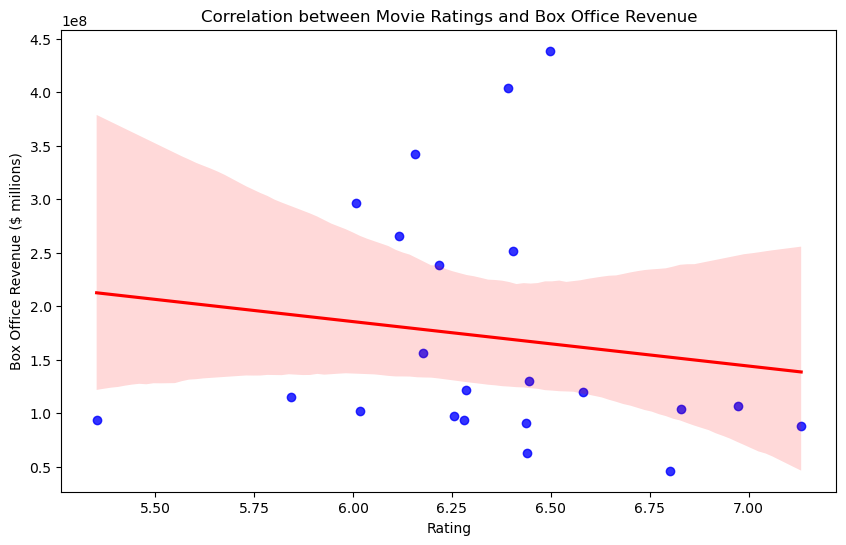

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='averagerating', y='total_revenue', data=data3, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Correlation between Movie Ratings and Box Office Revenue')
plt.xlabel('Rating')
plt.ylabel('Box Office Revenue ($ millions)')
plt.show()


In [24]:
# sort_data = data3.sort_values(by='average_ROI_per_movie', ascending=False)
# sort_data.head(10)
out_of_range = data3[(data3['averagerating'] > 1) | (data3['averagerating'] < 4)]
out_of_range.head(22)

,Genre,averagerating,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI,movie_count
0,Biography,6.971795,2.545666e+07,3.469678e+07,7.231284e+07,1.070096e+08,8.155297e+07,640.203056,195
1,Animation,6.498425,8.679362e+07,1.173423e+08,3.215562e+08,4.388985e+08,3.521049e+08,485.791763,127
2,Romance,6.280126,2.055426e+07,2.973649e+07,6.367772e+07,9.341421e+07,7.285994e+07,479.335480,317
3,Mystery,6.016742,2.137133e+07,3.143797e+07,7.013449e+07,1.015725e+08,8.020112e+07,981.774402,221
4,Sci-Fi,6.155500,7.100522e+07,9.272728e+07,2.499700e+08,3.426973e+08,2.716921e+08,341.363291,200
5,Documentary,7.132653,2.253645e+07,2.968135e+07,5.843281e+07,8.811416e+07,6.557771e+07,572.757720,196
6,News,6.800000,1.660000e+07,9.403741e+06,3.668208e+07,4.608582e+07,2.948582e+07,135.016469,3
7,Drama,6.436692,2.370732e+07,2.908992e+07,6.176916e+07,9.085908e+07,6.715177e+07,434.595038,1439
8,Crime,6.254875,2.767853e+07,3.042359e+07,6.638357e+07,9.680716e+07,6.912863e+07,241.874450,359
9,Adventure,6.391441,9.158111e+07,1.064022e+08,2.975774e+08,4.039797e+08,3.123986e+08,333.720975,444


In [25]:
# Inspect the 'averagerating' column
min_rating = data3['averagerating'].min()
max_rating = data3['averagerating'].max()

print(f"Smallest rating: {min_rating}")
print(f"Largest rating: {max_rating}")

Smallest rating: 5.351977401129943
Largest rating: 7.13265306122449


Percentiles for 'averagerating': [5.3519774  6.16096462 6.33905405 6.48520779 7.13265306]


C:\Users\User\AppData\Local\Temp\ipykernel_25988\1629141410.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_per_percentile = data3.groupby('rating_percentile')['total_revenue'].mean()


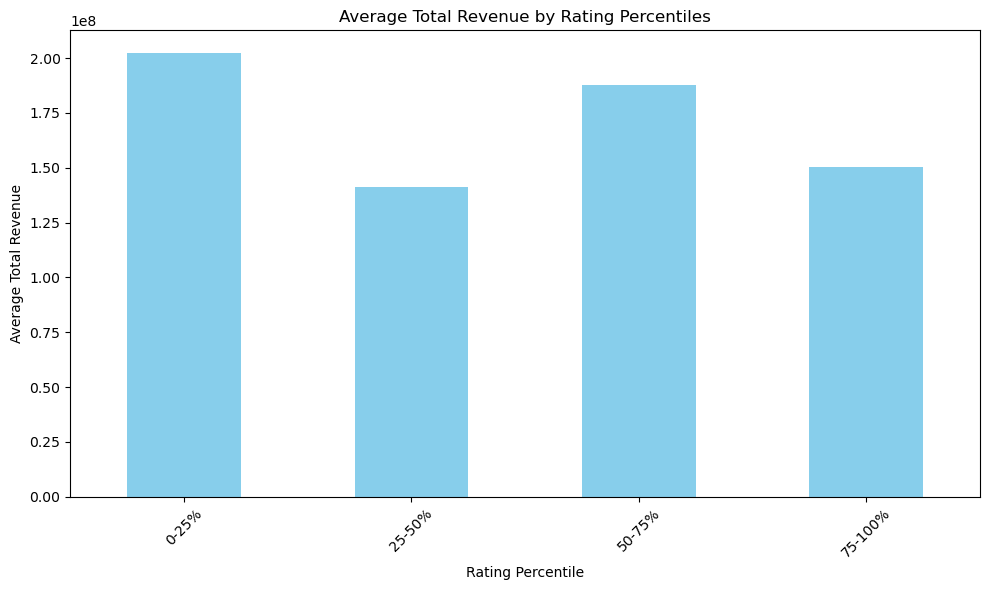

In [26]:
# Define percentiles
percentiles = np.percentile(data3['averagerating'].dropna(), [0, 25, 50, 75, 100])
print("Percentiles for 'averagerating':", percentiles)

# Plot the average rating against total revenue grouped by percentiles
data3['rating_percentile'] = pd.qcut(data3['averagerating'], q=4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])

# Calculate average total revenue per percentile
revenue_per_percentile = data3.groupby('rating_percentile')['total_revenue'].mean()

# Plotting
plt.figure(figsize=(10, 6))
revenue_per_percentile.plot(kind='bar', color='skyblue')
plt.title('Average Total Revenue by Rating Percentiles')
plt.xlabel('Rating Percentile')
plt.ylabel('Average Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Calculate correlation for the entire dataset
overall_correlation = data3['averagerating'].corr(data3['total_revenue'])

# Calculate correlation by genre
genre_correlations = data3.groupby('Genre').apply(lambda x: x['averagerating'].corr(x['total_revenue']))

# Display results
print("Overall Correlation between rating and revenue:", overall_correlation)
print("Correlation by Genre:")
print(genre_correlations)

c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Overall Correlation between rating and revenue: -0.14170371719822167
Correlation by Genre:
Genre
Action        NaN
Adventure     NaN
Animation     NaN
Biography     NaN
Comedy        NaN
Crime         NaN
Documentary   NaN
Drama         NaN
Family        NaN
Fantasy       NaN
History       NaN
Horror        NaN
Music         NaN
Musical       NaN
Mystery       NaN
News          NaN
Romance       NaN
Sci-Fi        NaN
Sport         NaN
Thriller      NaN
War           NaN
Western       NaN
dtype: float64


c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


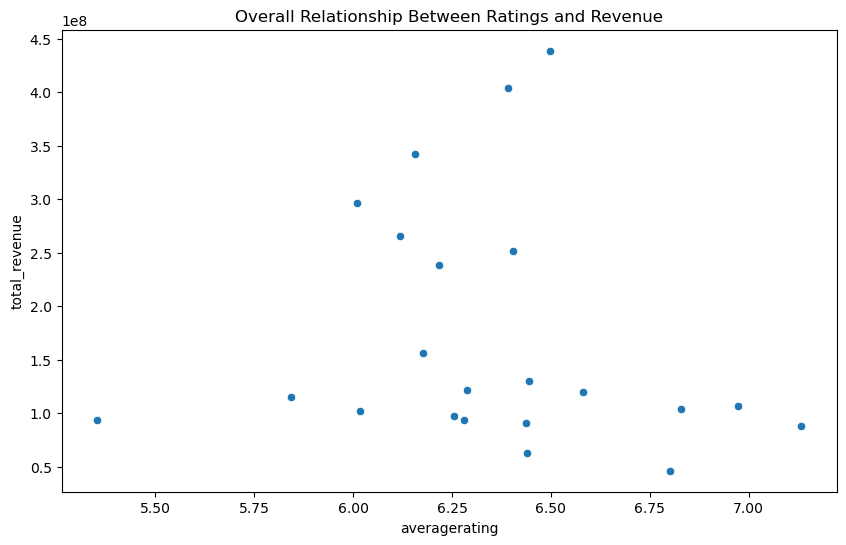

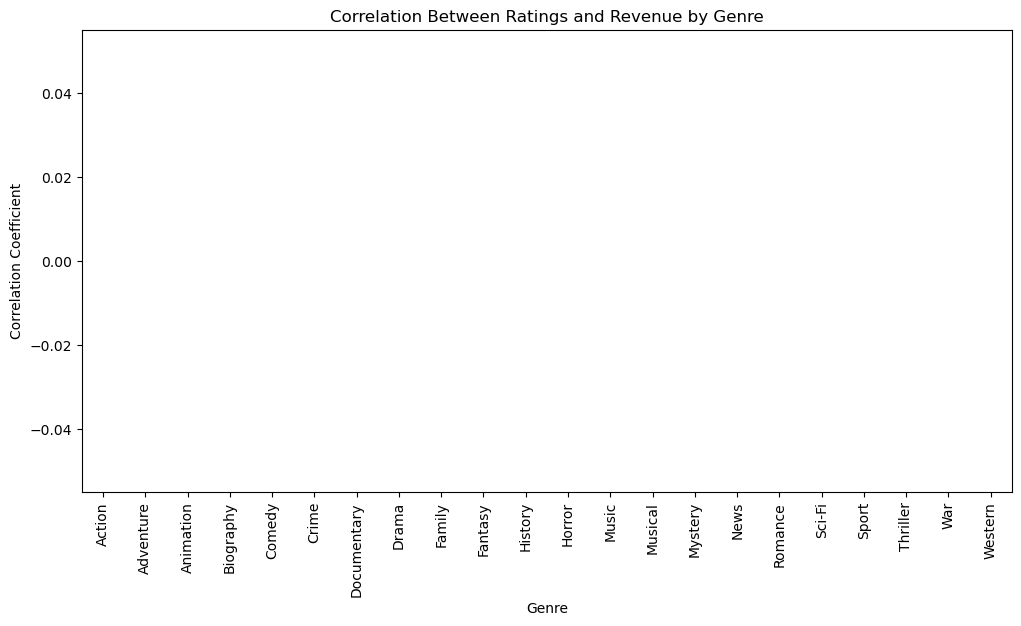

In [28]:
# Scatter plot for overall correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='averagerating', y='total_revenue', data=data3)
plt.title('Overall Relationship Between Ratings and Revenue')
plt.show()

# Bar chart for genre-wise correlation
genre_correlations.plot(kind='bar', figsize=(12, 6))
plt.title('Correlation Between Ratings and Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Correlation Coefficient')
plt.show()